In [100]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK SC']
plt.rcParams['axes.unicode_minus'] = False

#### 模型假设
``1.室内的热量传播只有传导形式 (不考虑对流、辐射)``

``2.室内温度与室外温度保持不变 (单位时间通过窗户单位面积的热量是常数)``

``3.玻璃厚度一定，玻璃材料均匀 (热导率是常数)``

#### 定义热传导模型函数
``Q——单位时间内由温度高的一侧向温度低的一侧通过单位面积的热量``

``d——单层玻璃厚度``

``L——两层玻璃之间的距离``

``T_in——室内温度``

``T_out——室外温度``

``lambda_glass——玻璃热导率``

``lambda_air——空气热导率``

In [102]:
def single_glass_heat_loss(T_in,T_out,lambda_glass,d):
    Q_single =lambda_glass*(T_in-T_out)/d
    return Q_single
def double_glass_heat_loss(T_in,T_out,lambda_glass,lambda_air,L,d):
    h = L/d
    s = h*lambda_glass/lambda_air
    Q_double = lambda_glass*(T_in-T_out)/(2*d+s*d)
    return Q_double

常用玻璃:
lambda_glass=0.4~0.8 W/(m*K)


静止的干燥空气:
lambda_air=0.025 W/(m*K)


取最保守的估计:
lambda_glass=0.4,lambda_air=0.025

此时反映双层玻璃保温性能的(Q_equiv - Q_double)/Q_equiv是关于h的函数


In [103]:
#不同情况热损失
lambda_glass = 0.4
lambda_air = 0.025
T_in = 20
T_out = -10
d = 0.003
L=0.012
Q_single = single_glass_heat_loss(T_in,T_out,lambda_glass,d)
Q_double = double_glass_heat_loss(T_in,T_out,lambda_glass,lambda_air,L,d)
Q_equiv =  double_glass_heat_loss(T_in,T_out,lambda_glass,lambda_air,0,d)# 等效单层玻璃(总玻璃厚度相同，用于比较)
print("热损失计算结果:")
print(f"  单层玻璃 (厚度{d*1000:.0f}mm玻璃): {Q_single:.2f} W")
print(f"  双层玻璃 (厚度{d*1000:.0f}mm玻璃+{L*1000:.0f}mm空气+厚度{d*1000:.0f}mm玻璃): {Q_double:.2f} W")
print(f"  等效单层玻璃 (厚度{d*1000:.0f}mm玻璃*2): {Q_equiv:.2f} W")
doublesaving_vs_single = (Q_single - Q_double) / Q_single * 100
doublesaving_vs_equiv = (Q_equiv - Q_double) / Q_equiv * 100
print(f"\n保温效果比较:")
print(f"  比单层玻璃节省: {doublesaving_vs_single:.1f}%")
print(f"  比等效厚度单层节省: {doublesaving_vs_equiv:.1f}%")

热损失计算结果:
  单层玻璃 (厚度3mm玻璃): 4000.00 W
  双层玻璃 (厚度3mm玻璃+12mm空气+厚度3mm玻璃): 60.61 W
  等效单层玻璃 (厚度3mm玻璃*2): 2000.00 W

保温效果比较:
  比单层玻璃节省: 98.5%
  比等效厚度单层节省: 97.0%


#### 分析空气层厚度的影响

In [104]:
air_thicknesses = np.linspace(0.001, 0.05, 100)
Q_values = []
for L in air_thicknesses:
    Q = double_glass_heat_loss(T_in,T_out,lambda_glass,lambda_air,L,d)
    Q_values.append(Q)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Noto Sans CJK SC
findfont: Generic family 'sans-serif' not found because none of the following families were found: Noto Sans CJK SC


findfont: Generic family 'sans-serif' not found because none of the following families were found: Noto Sans CJK SC
findfont: Generic family 'sans-serif' not found because none of the following families were found: Noto Sans CJK SC
findfont: Generic family 'sans-serif' not found because none of the following families were found: Noto Sans CJK SC
findfont: Generic family 'sans-serif' not found because none of the following families were found: Noto Sans CJK SC
findfont: Generic family 'sans-serif' not found because none of the following families were found: Noto Sans CJK SC
findfont: Generic family 'sans-serif' not found because none of the following families were found: Noto Sans CJK SC
findfont: Generic family 'sans-serif' not found because none of the following families were found: Noto Sans CJK SC
findfont: Generic family 'sans-serif' not found because none of the following families were found: Noto Sans CJK SC
findfont: Generic family 'sans-serif' not found because none of the foll

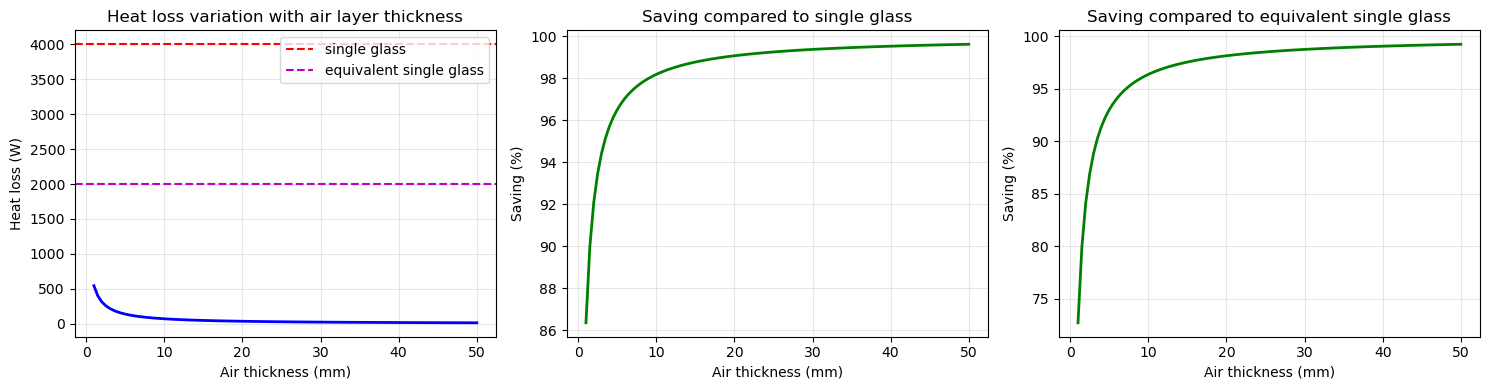

In [105]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.plot(air_thicknesses*1000, Q_values, 'b-', linewidth=2)
plt.axhline(y=Q_single, color='r', linestyle='--', label='single glass')
plt.axhline(y=Q_equiv, color='m', linestyle='--', label='equivalent single glass')
plt.xlabel('Air thickness (mm)')
plt.ylabel('Heat loss (W)')
plt.title('Heat loss variation with air layer thickness')
plt.grid(True, alpha=0.3)
plt.legend()
plt.subplot(1, 3, 2)
saving = (Q_single - np.array(Q_values)) / Q_single * 100
plt.plot(air_thicknesses*1000, saving, 'g-', linewidth=2)
plt.xlabel('Air thickness (mm)')
plt.ylabel('Saving (%)')
plt.title('Saving compared to single glass')
plt.grid(True, alpha=0.3)
plt.subplot(1, 3, 3)
saving = (Q_equiv - np.array(Q_values)) / Q_equiv * 100
plt.plot(air_thicknesses*1000, saving, 'g-', linewidth=2)
plt.xlabel('Air thickness (mm)')
plt.ylabel('Saving (%)')
plt.title('Saving compared to equivalent single glass')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### 从结果可以看出
1. 双层玻璃的保温效果远好于单层玻璃
2. 空气层厚度有一个最优范围（约5-20mm）
3. 太薄的空气层隔热效果不足，太厚则会产生对流反而降低效果